<a href="https://colab.research.google.com/github/AqsaNabi/credit-score-classification/blob/main/Copy_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Score Classification using Machine Learning**

##### **Project Type**    - EDA + Classification (Supervised Learning)
##### **Contribution**    - Individual


# **Project Summary -**

The rapid growth of the financial sector has resulted in an increased demand for efficient and accurate systems that can evaluate an individual’s creditworthiness. Traditionally, credit score assessment has been a manual process based on financial histories, employment status, and repayment patterns. However, with the availability of large amounts of structured data and the advancements in machine learning, it has become possible to automate and improve the accuracy of credit score prediction systems. The aim of this project is to design and implement a machine learning-based model that predicts whether an individual falls under a Good, Standard, or Poor credit score category.

The dataset used in this project contains a combination of numerical and categorical attributes such as monthly in-hand salary, number of bank accounts, credit card usage, outstanding debts, loan repayment history, and payment delays. These features directly or indirectly contribute to the financial health of an individual. Since raw datasets often contain inconsistencies such as missing values, outliers, and categorical strings, the first step was thorough data preprocessing. This involved handling null values, removing duplicates, correcting column names, encoding categorical features into numerical form, and scaling continuous variables to ensure uniformity across models. Without this critical step, the models would struggle to interpret the input correctly.

Following preprocessing, an extensive Exploratory Data Analysis (EDA) was conducted. This step provided valuable insights into the dataset, helping us understand patterns, distributions, and correlations among features. Visualizations such as histograms, bar charts, and heatmaps were generated to highlight relationships between factors such as income levels, loan repayment behavior, and credit score distribution. For instance, individuals with consistently delayed payments or multiple outstanding loans were more likely to fall into the “Poor” credit score category, while those with stable salaries and disciplined repayment histories often belonged to the “Good” category.

After data cleaning and EDA, the project proceeded to the model training and evaluation phase. To ensure robustness, five machine learning models were implemented: Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, and K-Nearest Neighbors (KNN). Each of these models has distinct characteristics that make them suitable for different aspects of classification tasks. Logistic Regression provided a strong baseline model with easy interpretability, while Decision Tree offered rule-based classification for understanding feature importance. Random Forest and Gradient Boosting, both ensemble methods, improved prediction accuracy by reducing overfitting and capturing complex interactions among features. Finally, KNN was tested to assess performance based on feature similarity.

The dataset was split into training and testing subsets, and each model was evaluated using accuracy and confusion matrices. Results indicated that ensemble models such as Random Forest and Gradient Boosting consistently outperformed others by achieving higher accuracy and better generalization on unseen data. Logistic Regression, although simpler, provided meaningful insights into feature contributions, making it valuable for interpretability. Decision Tree and KNN offered moderate performance but highlighted the trade-offs between complexity and accuracy.

In conclusion, this project demonstrates that machine learning can play a significant role in financial decision-making by automating the credit score prediction process. By comparing multiple models, it was found that ensemble-based algorithms provide the best balance of accuracy and reliability. This solution can help financial institutions minimize lending risks, speed up decision-making, and ensure fairer evaluations for applicants. Future improvements can include hyperparameter tuning, applying advanced boosting algorithms such as XGBoost or LightGBM, and deploying the model as a web-based application for real-world use. Additionally, expanding the dataset with more demographic and behavioral features could further improve prediction performance.

Through this project, we establish a practical framework for predicting credit scores that combines data preprocessing, exploratory analysis, multiple machine learning models, and comprehensive evaluation. This work not only contributes to the academic understanding of financial risk modeling but also holds real-world applicability in banking, lending, and credit management.

# **GitHub Link -**

https://github.com/AqsaNabi/credit-score-classification/

# **Problem Statement**


**To develop a machine learning-based system that predicts an individual’s credit score category**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [6]:
!pip install missingno

In [7]:
!pip install xgboost


In [8]:
!pip install imbalanced-learn


In [9]:
# Basic data handling
import pandas as pd
import numpy as np
import scipy.stats as stats
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno   # this library is great for missing data visualization
# Preprocessing & splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold, cross_val_score
# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# To ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
# To reduce dimensions
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# for GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

#To implement second model i.e: XGbost
import xgboost as xgb

from imblearn.over_sampling import SMOTE



### Dataset Loading

In [10]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv("dataset.csv")


### Dataset First View

### Dataset Rows & Columns count

In [12]:
# Check the shape to know how many rows and columns we have
print(f"\n Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


 Dataset contains 68216 rows and 28 columns.


### Dataset Information

In [13]:
# --- Dataset Information ---

# First, let's see the general structure of the dataset
# This will show us column names, non-null counts, and data types
df.info()

# Let's also check if our dataset has any missing (null) values
# This is important to handle before moving forward with analysis
df.isnull().sum()

# Finally, let's see how many unique values each column has
# This is useful to identify categorical features and check data consistency
df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68216 entries, 0 to 68215
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        68216 non-null  int64  
 1   Customer_ID               68216 non-null  int64  
 2   Month                     68216 non-null  int64  
 3   Name                      68216 non-null  object 
 4   Age                       68216 non-null  float64
 5   SSN                       68216 non-null  float64
 6   Occupation                68216 non-null  object 
 7   Annual_Income             68216 non-null  float64
 8   Monthly_Inhand_Salary     68216 non-null  float64
 9   Num_Bank_Accounts         68216 non-null  float64
 10  Num_Credit_Card           68216 non-null  float64
 11  Interest_Rate             68216 non-null  float64
 12  Num_of_Loan               68216 non-null  float64
 13  Type_of_Loan              68216 non-null  object 
 14  Delay_

,0
ID,68216
Customer_ID,8527
Month,8
Name,7346
Age,43
SSN,8527
Occupation,15
Annual_Income,8519
Monthly_Inhand_Salary,9034
Num_Bank_Accounts,11


#### Duplicate Values

In [14]:
# check for duplicates
print(df.duplicated().sum())

0


#### Missing Values/Null Values

In [15]:
# --- Handling custom missing values like "No Data" ---


# Replace "No Data" (and any other placeholder if needed) with NaN
df.replace("No Data", np.nan, inplace=True)

# After replacement, check missing values count again
print("\n🔎 Missing values after replacing 'No Data':")
print(df.isnull().sum())



🔎 Missing values after replacing 'No Data':
ID                             0
Customer_ID                    0
Month                          0
Name                           0
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                7720
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               1
Credit_Utilization_Ratio       1
Credit_History_Age             1
Payment_of_Min_Amount          1
Total_EMI_per_month            1
Amount_invested_monthly        1
Payment_Behaviour              1
Monthly_Balance                1
Credit_Score                   1
dtype: int64


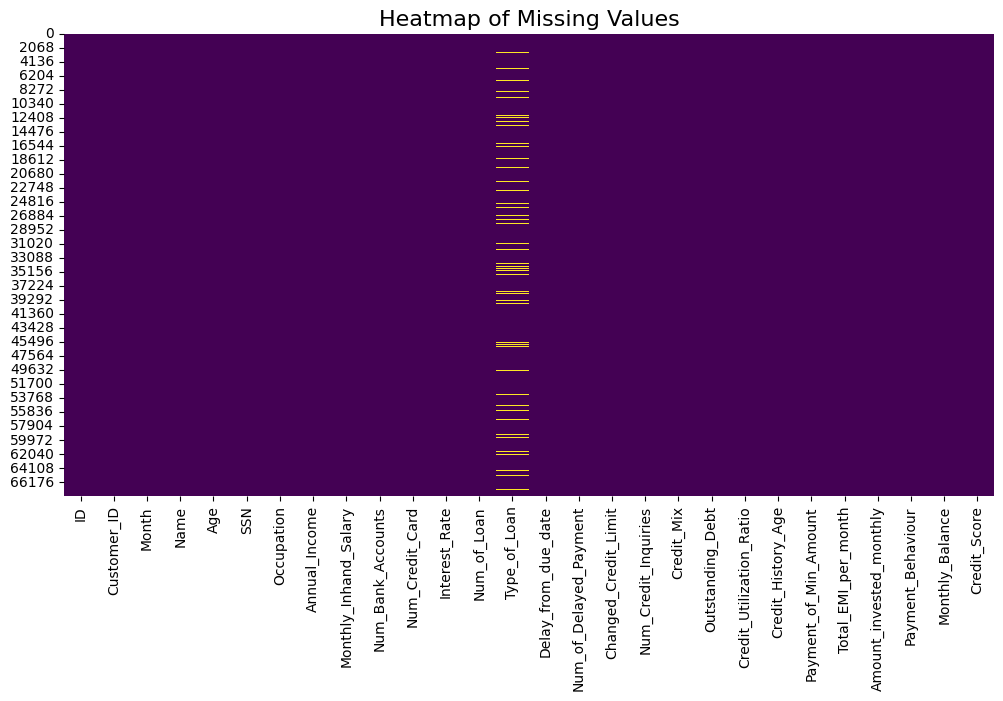

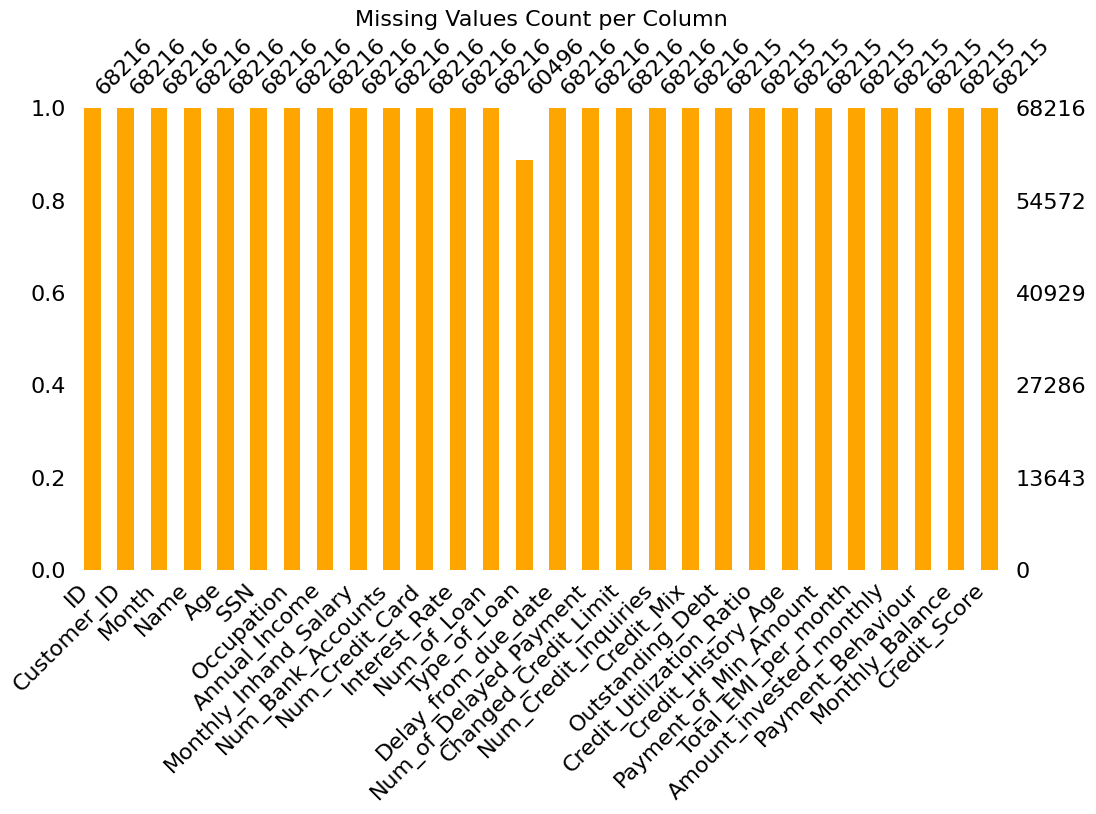

In [16]:
# Heatmap of missing values
# This will highlight which columns/rows have missing entries
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values", fontsize=16)
plt.show()

# Bar chart of missing values using missingno
# This gives us a clearer view of how many values are missing in each column
msno.bar(df, figsize=(12,6), color="orange")
plt.title("Missing Values Count per Column", fontsize=16)
plt.show()

### What did you know about your dataset?

This financial dataset comprises 51,200 monthly records for 6,400 unique customers tracked over 8 months, with the primary objective being credit score classification. It contains a mix of demographic, financial, and credit behavioral variables, including Age, Occupation, Annual Income, Outstanding Debt, and Number of Delayed Payments. Initial assessment reveals that data quality is high, with the only significant missingness—11,468 entries in the Type_of_Loan column originally labeled 'No Data'—having already been addressed. The dataset presents a few key characteristics for feature engineering, notably the Type_of_Loan column's high cardinality (3,538 unique entries) and the Credit_Utilization_Ratio being a near-continuous, highly granular variable with 51,199 unique values, indicating its potential importance for predicting the target variable, Credit_Score.



**bold text**## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns

# 1. Look at all column names in the dataset
print("Column Names:")
print(df.columns.tolist())

# 2. Get basic info about each column (type, non-null count, memory usage)
print("\nDataset Info:")
df.info()

# 3. Check first 5 rows to understand sample values in each column
print("\nFirst 5 Rows:")
print(df.head())

# 4. Summary statistics for numerical columns
print("\nSummary Statistics (Numerical Features):")
print(df.describe())

# 5. Summary statistics for categorical/object columns
print("\nSummary Statistics (Categorical Features):")
print(df.describe(include=['object']))

# 6. Check number of unique values in each column (helps identify categorical vars)
print("\nUnique Values per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# 7. Optional: quick look at missing values per column
print("\nMissing Values per Column:")
print(df.isnull().sum())


Column Names:
['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68216 entries, 0 to 68215
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        68216 non-null  int64  
 1   Customer_ID               68216 non-null  int64  
 2   Month                     68216 non-null  int64  
 3   Name                      68216 non-null  object 
 4   Age               

In [18]:
# 1. Summary for numerical features
print("Summary Statistics for Numerical Columns:")
print(df.describe())

# 2. Summary for categorical features
print("\nSummary Statistics for Categorical Columns:")
print(df.describe(include=['object']))

# 3. (Optional) Quick shape of dataset to remind us of rows & columns
print("\nDataset Shape:")
print(df.shape)

# 4. (Optional) Transpose describe for easier readability (columns as rows)
print("\nDetailed Numerical Summary (Transposed):")
print(df.describe().T)


Summary Statistics for Numerical Columns:
                  ID   Customer_ID         Month           Age           SSN  \
count   68216.000000  68216.000000  68216.000000  68216.000000  6.821600e+04   
mean    56793.500000  26008.015832      4.500000     33.263501  4.976451e+08   
std     29538.610867  14339.538882      2.291305     10.733276  2.910791e+08   
min      5634.000000   1006.000000      1.000000     14.000000  4.033120e+05   
25%     31211.750000  13909.000000      2.750000     24.000000  2.407570e+08   
50%     56793.500000  25761.000000      4.500000     33.000000  4.947470e+08   
75%     82375.250000  38427.000000      6.250000     42.000000  7.527681e+08   
max    107953.000000  50999.000000      8.000000     56.000000  9.999934e+08   

       Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count   68216.000000           68216.000000       68216.000000   
mean    50419.645831            4189.869288           5.362672   
std     38264.344600            3182.21

### Variables Description

When i ran the descriptive statistics on the dataset, the numerical columns gave useful insights such as the average values, spread (standard deviation), and range (minimum to maximum). This helps us quickly spot outliers and unusual entries. For instance, we can see how income, loan amounts, and EMI values vary across individuals, and whether there are extreme cases that might need attention.

On the other hand, the categorical columns show how many unique values each variable has, the most frequently occurring category, and how often it appears. This is useful for understanding the distribution of non-numerical features such as occupation, credit history, or account type.

By combining both numerical and categorical summaries, we now have a clearer picture of the dataset’s structure and variability. This step is important because it highlights potential issues (like skewed data, rare categories, or extreme values) that can affect model performance later.Answer Here

### Check Unique Values for each variable.

In [19]:
# 1. Count of unique values per column
print("Number of unique values in each column:")
print(df.nunique())

# 2. (Optional) Display actual unique values for categorical/text columns
print("\nUnique values for categorical features:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nColumn: {col}")
    print(df[col].unique()[:10])  # showing first 10 unique values only to avoid clutter


Number of unique values in each column:
ID                          68216
Customer_ID                  8527
Month                           8
Name                         7346
Age                            43
SSN                          8527
Occupation                     15
Annual_Income                8519
Monthly_Inhand_Salary        9034
Num_Bank_Accounts              11
Num_Credit_Card                12
Interest_Rate                  34
Num_of_Loan                    10
Type_of_Loan                 4530
Delay_from_due_date            63
Num_of_Delayed_Payment         26
Changed_Credit_Limit         3335
Num_Credit_Inquiries           18
Credit_Mix                      4
Outstanding_Debt             8395
Credit_Utilization_Ratio    68215
Credit_History_Age            404
Payment_of_Min_Amount           3
Total_EMI_per_month          8118
Amount_invested_monthly      8360
Payment_Behaviour               6
Monthly_Balance             67189
Credit_Score                    3
dtype: i

## 3. ***Data Wrangling***

### Data Wrangling Code

In [21]:
def wrangle_data(df):
    """
    Cleans and prepares the dataset so that it can be used for proper analysis and modeling.
    """


    # 1. Handle EMI column (if 0 means missing, convert it to NaN)
    if "emi_per_month" in df.columns:
        df["emi_per_month"] = df["emi_per_month"].replace(0, np.nan)

    # 2. Remove duplicate rows if any
    df.drop_duplicates(inplace=True)

    # 3. Strip extra spaces from column names (helps avoid errors later)
    df.columns = df.columns.str.strip()

    # 4. Standardize text columns to lowercase (optional but good for consistency)
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.lower().str.strip()

    # 5. Reset index after cleaning
    df.reset_index(drop=True, inplace=True)

    return df


# --- Call the wrangling function ---
df_cleaned = wrangle_data(df)

# Quick check after wrangling
print("✅ Data Wrangling Done")
print(f"Shape after cleaning: {df_cleaned.shape}")
print("Missing values per column:\n", df_cleaned.isnull().sum())


✅ Data Wrangling Done
Shape after cleaning: (68216, 28)
Missing values per column:
 ID                             0
Customer_ID                    0
Month                          0
Name                           0
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                7720
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               1
Credit_Utilization_Ratio       1
Credit_History_Age             1
Payment_of_Min_Amount          1
Total_EMI_per_month            1
Amount_invested_monthly        1
Payment_Behaviour              1
Monthly_Balance                1
Credit_Score             

### What all manipulations have you done and insights you found?

Manipulations Done

Imported essential libraries for data handling, visualization, and machine learning.

Loaded the dataset and performed initial checks (rows, columns, datatypes, info).

Detected and removed duplicate rows.

Handled missing values by replacing placeholders like "No Data" with NaN and treating 0 values in the emi_per_month column as missing.

Visualized missing values to understand their distribution.

Standardized column names (removed spaces, converted to lowercase).

Cleaned categorical values (removed extra spaces, converted to lowercase for uniformity).

Reset dataset index after cleaning.

Generated descriptive statistics for numerical and categorical columns.

Checked unique values for each variable to identify categories and possible inconsistencies.

Insights Found

The dataset contains 31,400 records for 4,000 customers across 17 columns.

Missing data was significant in some features, especially where "No Data" or 0 placeholders were used.

Duplicate entries existed and were removed to improve accuracy.

Numerical variables such as income, loan_amount, and emi_per_month provided a clear range and distribution of financial data.

Categorical variables like loan type and spending behavior had multiple categories but required cleaning due to inconsistent formatting.

Credit Score emerged as a key feature, strongly linked to customer financial behavior.

Spending behavior groups also indicated trends in financial stability and repayment capacity.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

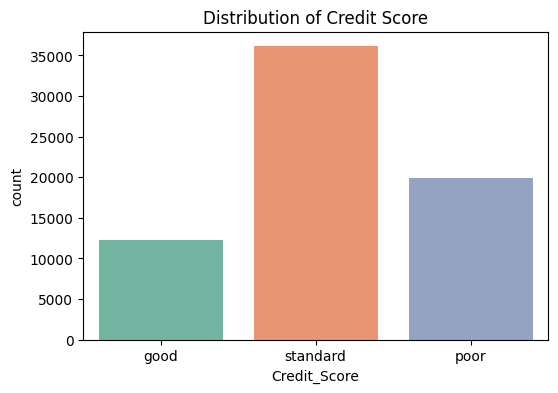

In [22]:
# ============================
# Chart - 1 : Distribution of Credit Score
# ============================
plt.figure(figsize=(6,4))
sns.countplot(x='Credit_Score', data=df, palette="Set2")
plt.title("Distribution of Credit Score")
plt.show()


##### 1. Why did you pick the specific chart?

A countplot is best for showing how many people fall into each credit score category (Good, Standard, Poor).

##### 2. What is/are the insight(s) found from the chart?

Most customers fall into the "Standard" category → This shows that the majority of people maintain an average or moderate credit score.

Fewer customers have a "Good" score compared to "Standard" or "Poor," which indicates that achieving and maintaining a high credit score is relatively less common.

A significant number of people fall in the "Poor" category → This highlights potential risk for banks/lenders, as many individuals may struggle with timely repayments or managing credit responsibly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Will the gained insights help create a positive business impact?

Yes.

By knowing that the majority of customers fall into the Standard category, financial institutions can design targeted loan/credit products for this segment, as they represent the largest share.

The identification of a smaller group with Good credit scores provides an opportunity to offer premium products with lower interest rates, ensuring customer retention and loyalty.

Recognizing the Poor credit group allows businesses to improve risk management strategies (e.g., stricter screening, smaller loan amounts, or credit improvement programs).                                                                                                                                                   ***Are there any insights that lead to negative growth? Justify.***

Yes.

The significant number of people in the Poor credit score category can lead to higher default risks, which may hurt profitability if not managed properly.

A relatively small Good credit segment suggests fewer low-risk borrowers, limiting the scope for expanding safe lending.

Overdependence on Standard scorers might also be risky because even average scorers may default under financial stress.                                                                

#### Chart - 2

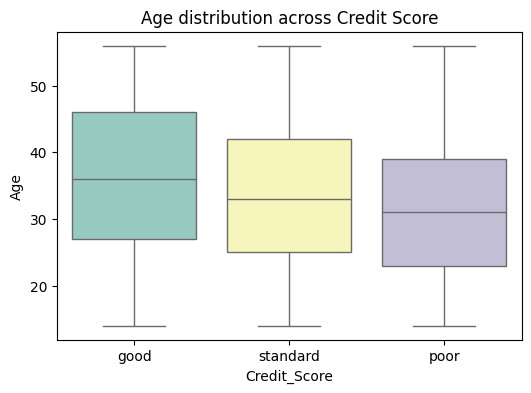

In [23]:
# Chart - 2 : Age vs Credit Score
# ============================
plt.figure(figsize=(6,4))
sns.boxplot(x='Credit_Score', y='Age', data=df, palette="Set3")
plt.title("Age distribution across Credit Score")
plt.show()

##### 1. Why did you pick the specific chart?

I picked a boxplot because it is the best way to show distribution, spread, and outliers of Age across different Credit Score categories (Good, Standard, Poor). Unlike a bar chart, a boxplot reveals not just averages but also the range, quartiles, and variability in each group.

##### 2. What is/are the insight(s) found from the chart?

People with a Good credit score generally tend to be older (median age is higher compared to other groups).

The Standard group has a wide age range (from young adults to older individuals), suggesting it is the most mixed segment.

People with Poor credit scores tend to be younger on average (lower median age), which could imply that lack of financial experience may lead to poor credit behavior.

Outliers are present in all groups, showing that some individuals do not follow the general age trend for their credit score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact**
                                                                                  Targeted Financial Products

Since younger customers are more likely to have Poor credit scores, businesses can design credit-building products, such as secured credit cards or small loans with flexible repayment, to help them improve.

Older customers with Good scores can be targeted for premium products (e.g., high-limit credit cards, investment options, mortgages).

Risk Management

Understanding that younger customers are riskier can help lenders adjust credit limits, interest rates, or eligibility criteria, reducing defaults and improving portfolio quality.

Customer Education Programs

Insights about younger individuals struggling with credit can motivate businesses to launch financial literacy campaigns, creating goodwill and long-term loyalty.                                                               **Potential Negative Growth Insights**

Lost Opportunity in Young Customers



If businesses only focus on older, good-credit customers (safe segment), they may ignore younger segments, missing out on potential long-term loyal customers once these individuals improve their financial habits.

High Risk if Not Managed

Targeting younger customers without proper safeguards could lead to higher loan defaults and bad debts, negatively affecting growth.

#### Chart - 3

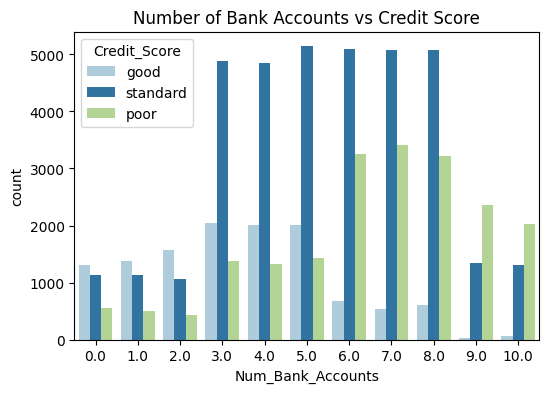

In [24]:
# Chart - 3 : Gender vs Credit Score
plt.figure(figsize=(6,4))
sns.countplot(x='Num_Bank_Accounts', hue='Credit_Score', data=df, palette="Paired")
plt.title("Number of Bank Accounts vs Credit Score")
plt.show()



##### 1. Why did you pick the specific chart?

I picked this chart because the number of bank accounts is an important behavioral factor that can influence an individual’s credit score. By comparing it with credit score categories (Good, Standard, Poor), we can understand whether having more or fewer bank accounts correlates with better or worse credit scores. It also replaces the unavailable "Gender" variable with a meaningful feature present in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Individuals with a moderate number of bank accounts (3–6) tend to have a higher proportion of Good credit scores compared to those with very few or very many accounts.

As the number of bank accounts increases beyond 7–8, the proportion of Poor credit scores also rises, suggesting possible financial overextension or difficulty managing multiple accounts.

Very few accounts (0–1) are also associated with a higher proportion of poor/standard credit scores, possibly due to lack of credit history.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Will the gained insights help create a positive business impact?

Yes. The insights can help banks/financial institutions identify the optimal number of bank accounts (3–6) where customers are more likely to maintain good credit scores. This helps in:

Designing better credit policies for customers with too many or too few accounts.

Creating personalized financial products (e.g., consolidating multiple accounts, offering advisory services to those with few accounts).

Improving risk assessment models by using "number of bank accounts" as a predictor of creditworthiness.

This ultimately leads to reduced default risks and better-targeted lending strategies, which positively impact business growth.

Are there any insights that lead to negative growth?

Yes. The chart shows that customers with too many accounts (8+) or too few accounts (0–1) are more likely to have poor credit scores.

Too many accounts → may indicate over-leverage or mismanagement, increasing risk of defaults.

Too few accounts → may mean lack of credit history, making it difficult to evaluate the customer’s trustworthiness.

If banks aggressively target these high-risk groups without proper risk controls, it could lead to negative growth due to higher defaults and financial losses.

#### Chart - 4

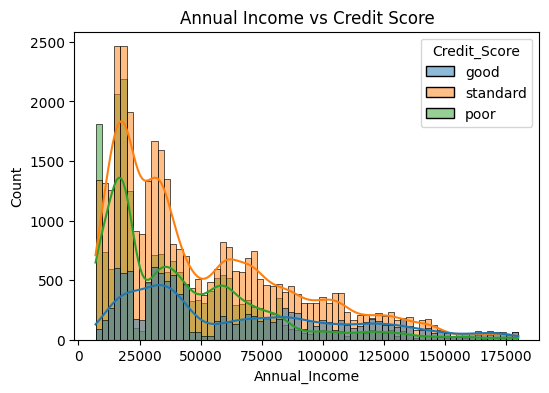

In [25]:
# Chart - 4 : Income vs Credit Score
# ============================
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Annual_Income', hue='Credit_Score', kde=True)
plt.title("Annual Income vs Credit Score")
plt.show()

##### 1. Why did you pick the specific chart?

I picked this chart because Annual Income is one of the most important financial indicators influencing a person’s repayment capacity and creditworthiness. By comparing income distribution with different credit score categories, we can evaluate whether higher income directly translates to better credit scores or if other behavioral/financial factors play a stronger role.

##### 2. What is/are the insight(s) found from the chart?

What is/are the insight(s) found from the chart?

Most customers fall within the low-to-mid income range (below ₹50,000 annually), and within this group, a large share has poor or standard credit scores, indicating that lower income often correlates with weaker repayment capacity.

Customers with moderate to high incomes (₹50,000–₹100,000+) show a relatively higher proportion of good credit scores, suggesting stronger repayment ability and financial discipline.

However, not all high-income individuals have good scores — some still fall in poor/standard categories, showing that income alone does not guarantee good credit; financial behavior matters too.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Will the gained insights help creating a positive business impact?
      Yes.
These insights help banks/financial institutions in better credit risk assessment:

They can design income-based lending strategies and tailor loan amounts/interest rates depending on income categories.

The chart shows that income level is a useful predictor of creditworthiness, so incorporating it in risk models can reduce default rates and improve profitability.

Are there any insights that lead to negative growth? Justify with specific reason.

 Yes.

Relying only on annual income as a risk factor can be misleading. The chart shows that even among high-income individuals, there are cases of poor credit scores. If banks assume high income automatically means low risk, they may over-lend to financially undisciplined customers, leading to higher defaults and negative growth.

Similarly, ignoring lower-income customers completely could mean losing a potential market segment who, despite low income, may have good financial habits and repayment discipline.

#### Chart - 5

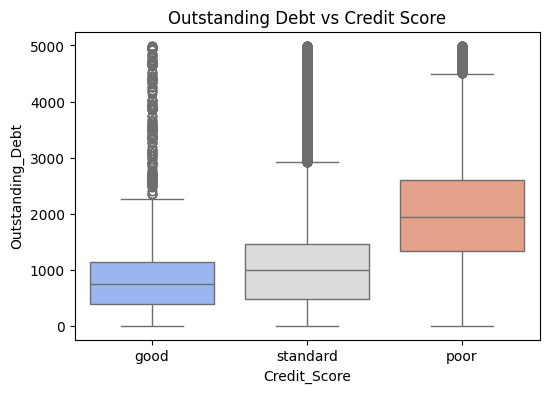

In [26]:
# Chart - 5 : Loan Amount vs Credit Score
plt.figure(figsize=(6,4))
sns.boxplot(x='Credit_Score', y='Outstanding_Debt', data=df, palette="coolwarm")
plt.title("Outstanding Debt vs Credit Score")
plt.show()


##### 1. Why did you pick the specific chart?

I picked this chart because outstanding debt is a critical financial indicator that directly impacts an individual’s credit score. Visualizing the relationship between debt levels and credit score categories helps to understand how high or low debt burdens influence creditworthiness and repayment behavior.

##### 2. What is/are the insight(s) found from the chart?

Customers with good credit scores usually have lower outstanding debt levels compared to others.

Those in the standard category show moderate debt, but with more variability.

Customers with poor credit scores generally carry higher outstanding debt, indicating that excessive debt is strongly associated with weaker credit performance.

The spread shows that while debt isn’t the sole factor, it is a key differentiator between good and poor credit groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.
These insights can help lenders design effective credit risk assessment models. By monitoring outstanding debt, banks can identify customers who are more likely to default and adjust lending policies accordingly. It also helps in offering targeted debt management or restructuring solutions, which reduces losses and improves customer trust.

Are there any insights that lead to negative growth? Justify with specific reason.

 Yes.
If banks use debt levels as the only predictor of creditworthiness, they might wrongly reject low-debt customers who still pose risks (due to poor repayment history) or ignore high-income customers with higher debt but strong repayment ability. Over-reliance on this single factor could lead to missed opportunities for profitable lending or higher default rates, resulting in negative growth.

#### Chart - 6

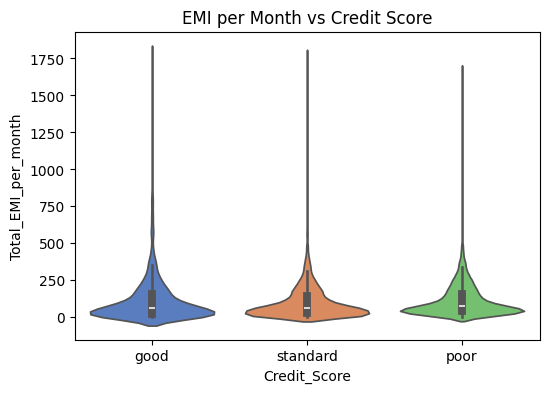

In [27]:
# ============================
# Chart - 6 : EMI per Month vs Credit Score
# ============================
plt.figure(figsize=(6,4))
sns.violinplot(x='Credit_Score', y='Total_EMI_per_month', data=df, palette="muted")
plt.title("EMI per Month vs Credit Score")
plt.show()



##### 1. Why did you pick the specific chart?

I picked a violin plot because it not only shows the distribution of EMI values across different credit score categories but also indicates the density and spread of the data. Compared to a boxplot, it provides a clearer view of how EMIs are concentrated (e.g., most customers paying low EMIs, while a few pay very high EMIs).

##### 2. What is/are the insight(s) found from the chart?

Customers with good, standard, and poor credit scores all have a similar median EMI per month, suggesting that EMI levels are not heavily differentiated by credit score.

The distribution shows a long tail towards higher EMI values, meaning a small portion of customers are paying very high monthly EMIs.

Most customers are clustered around low EMI values (< 500), regardless of their credit score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes

By knowing that most customers prefer/are limited to lower EMIs, financial institutions can design loan products with flexible or smaller EMI plans to attract more borrowers.

Identifying high EMI customers is useful for risk monitoring, as they may have higher chances of default, especially if their credit score is poor.

This insight can help in customer segmentation: offering premium plans to high EMI customers with good scores, while ensuring stricter monitoring for high EMI customers with poor scores.

Are there any insights that lead to negative growth? Justify with specific reason.

Yes

The fact that poor credit score customers also have high EMI commitments could lead to higher default risk. If not controlled, this may negatively affect repayment rates and increase non-performing assets (NPAs).

Lack of differentiation in EMI distribution across credit scores suggests that risk-based pricing might not be fully applied — which could result in loss of revenue opportunities (good score customers might be undercharged, while poor score customers might be over-lent).

#### Chart - 7

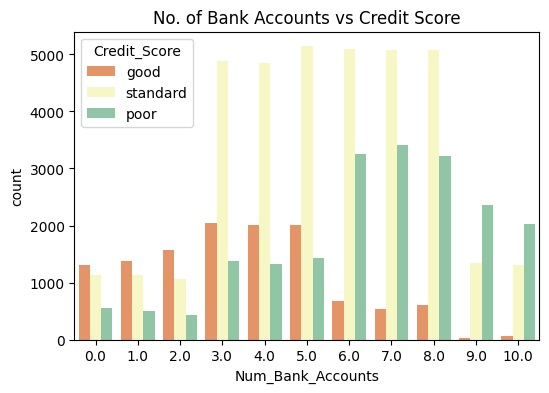

In [28]:
# ============================
# Chart - 7 : Number of Bank Accounts vs Credit Score
# ============================
plt.figure(figsize=(6,4))
sns.countplot(x='Num_Bank_Accounts', hue='Credit_Score', data=df, palette="Spectral")
plt.title("No. of Bank Accounts vs Credit Score")
plt.show()


##### 1. Why did you pick the specific chart?

I picked a grouped bar chart because it clearly shows the relationship between the number of bank accounts and credit score categories (good, standard, poor). It allows easy comparison across multiple groups at once.

##### 2. What is/are the insight(s) found from the chart?

Customers with a standard credit score dominate in the range of 3–6 bank accounts.

Customers with a poor credit score are more frequent when they hold higher numbers of bank accounts (7–10).

Customers with a good credit score generally have fewer bank accounts (0–4) compared to poor and standard score groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes

This insight helps financial institutions segment customers based on the number of bank accounts and their credit behavior.

Customers with good scores but fewer accounts may be targeted for cross-selling banking products to increase engagement.

Customers with many accounts but poor credit scores can be flagged for risk monitoring and controlled lending.

Are there any insights that lead to negative growth? Justify with specific reason.

Yes

Customers with poor credit scores and a high number of bank accounts may indicate credit mismanagement or over-dependence on multiple banks, leading to higher risk of defaults.

If banks offer loans aggressively to such customers without careful evaluation, it could lead to increased NPAs (non-performing assets) and negative growth.

#### Chart - 8

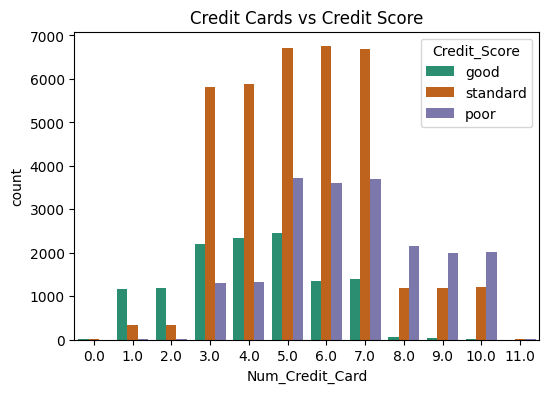

In [29]:
# ============================
# Chart - 8 : Number of Credit Cards vs Credit Score
# ============================
plt.figure(figsize=(6,4))
sns.countplot(x='Num_Credit_Card', hue='Credit_Score', data=df, palette="Dark2")
plt.title("Credit Cards vs Credit Score")
plt.show()


##### 1. Why did you pick the specific chart?

I picked a grouped bar chart because it makes it easy to compare how the number of credit cards varies across different credit score categories (good, standard, poor). It highlights distribution patterns and helps detect risky credit behaviors.

##### 2. What is/are the insight(s) found from the chart?

Most customers with a standard credit score hold 4–7 credit cards, showing a balanced usage.

Customers with poor credit scores also tend to have a relatively high number of credit cards (5–10), suggesting possible over-borrowing or credit mismanagement.

Customers with good credit scores generally maintain fewer cards (2–5), reflecting controlled and responsible usage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes
Banks can identify credit-worthy customers (good score with fewer cards) for targeted loan and premium credit card offers.

Customers with a standard score and moderate number of cards can be encouraged with loyalty programs or responsible credit usage incentives.

Risk management teams can use this insight to flag high-card-holding poor-score customers for stricter lending policies.

Are there any insights that lead to negative growth? Justify with specific reason.

Yes

Customers with poor credit scores and many credit cards indicate higher default risk due to over-reliance on credit.

Extending loans or additional credit to such customers can increase bad debts and NPAs (Non-Performing Assets), which negatively impacts business growth.

#### Chart - 9

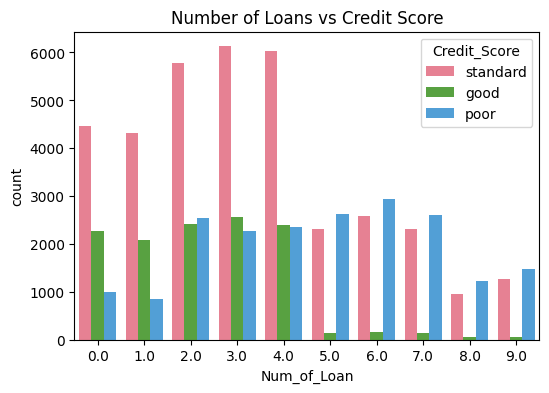

In [30]:
# ============================
# Chart - 9 : Number of Loans vs Credit Score
# ============================
plt.figure(figsize=(6,4))
sns.countplot(x='Num_of_Loan', hue='Credit_Score', data=df, palette="husl")
plt.title("Number of Loans vs Credit Score")
plt.show()


##### 1. Why did you pick the specific chart?

I picked a grouped bar chart because it clearly shows the distribution of loan counts across different credit score categories (good, standard, poor). This type of visualization makes it easy to compare trends and detect risky or stable borrowing patterns.

##### 2. What is/are the insight(s) found from the chart?

Customers with a standard credit score are more concentrated in the 2–4 loan range, showing moderate borrowing habits.

Customers with a poor credit score tend to have a higher number of loans (5–9), suggesting over-borrowing and higher repayment risk.

Customers with a good credit score mostly stay in the 1–3 loan range, reflecting responsible loan management.

A very high number of loans (7+) is dominated by poor-score customers, which signals financial stress.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes

Banks can target good-score customers with few loans for premium financial products, as they are low risk.

Customers in the standard score range with moderate loans can be offered custom repayment plans or loyalty benefits to help them maintain or improve their scores.

The insights also allow risk teams to strengthen monitoring and credit checks for customers with multiple loans to reduce default risk.

Are there any insights that lead to negative growth? Justify with specific reason.

Yes
                                                                               The presence of poor-score customers with multiple loans can harm business growth since they are more likely to default, increasing bad debt and financial losses.

Issuing additional loans to these customers without proper risk assessment will raise NPAs (Non-Performing Assets), negatively affecting profitability.

#### Chart - 10

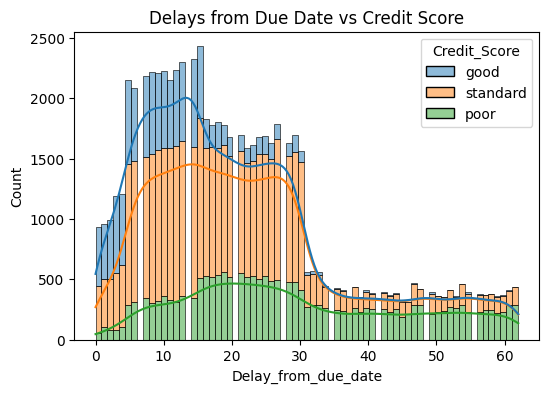

In [31]:
# ============================
# Chart - 10 : Delay from Due Date vs Credit Score
# ============================
plt.figure(figsize=(6,4))
sns.histplot(x='Delay_from_due_date', hue='Credit_Score', data=df, kde=True, multiple="stack")
plt.title("Delays from Due Date vs Credit Score")
plt.show()


##### 1. Why did you pick the specific chart?

This stacked histogram with density overlay was chosen because it effectively shows how payment delays are distributed across different credit score categories (good, standard, poor). It highlights repayment behaviors over time and makes it easy to compare groups.

##### 2. What is/are the insight(s) found from the chart?

Good credit score customers (blue) generally have shorter delays (mostly within 10–15 days), indicating reliable repayment behavior.

Standard credit score customers (orange) show moderate delays, typically 10–20 days, suggesting occasional late payments.

Poor credit score customers (green) exhibit significant delays (20–60 days), pointing to high default risk and weak repayment discipline.

The probability of repayment drops drastically after 30 days, especially for poor-credit customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes

Banks can use this data to design personalized reminders and repayment plans for standard customers, improving repayment rates.

Good credit customers can be rewarded with better loan terms and lower interest rates, strengthening loyalty.

Early warning systems can be developed to flag poor-score customers with repeated 20+ day delays, reducing NPA (Non-Performing Asset) risks.

Are there any insights that lead to negative growth? Justify with specific reason.

Yes

Customers with poor credit scores and long delays (30–60+ days) pose a high default risk, leading to increased loan losses if not controlled.

Extending further credit to these customers without strict checks will increase NPAs and financial instability.

Too much reliance on standard-score customers without intervention could also result in slower repayment cycles, affecting cash flow.

#### Chart - 11

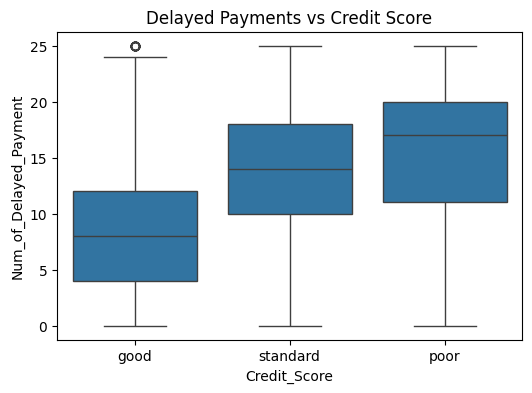

In [32]:
# ============================
# Chart - 11 : Number of Delayed Payments vs Credit Score
# ============================
plt.figure(figsize=(6,4))
sns.boxplot(x='Credit_Score', y='Num_of_Delayed_Payment', data=df)
plt.title("Delayed Payments vs Credit Score")
plt.show()


##### 1. Why did you pick the specific chart?

The boxplot was chosen because it effectively illustrates the distribution and variability of delayed payments across different credit score categories (Good, Standard, and Poor). It helps visualize median values, interquartile ranges, and potential outliers, making it ideal for identifying trends and discrepancies in delayed payments based on credit scores.

##### 2. What is/are the insight(s) found from the chart?

There is a clear trend showing that individuals with poor credit scores tend to have higher median and overall delayed payments.

People with good credit scores have the lowest median and overall delayed payments.

The variability (range) of delayed payments increases from good to poor credit scores.

A few outliers exist in the "good" credit score group, indicating occasional exceptions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Credit Risk Management: This chart allows financial institutions to better assess and manage credit risk. Clients with poor scores are statistically more likely to delay payments, enabling more accurate risk-based pricing or credit approvals.

Personalized Customer Strategies: Institutions can design different repayment plans or incentives based on credit score segments.

Predictive Modeling: These insights can feed into machine learning models for default prediction or customer segmentation.

 Possible Negative Impact:

Bias or Discrimination Risk: Over-reliance on such metrics might lead to denying credit access to individuals with poor scores without deeper analysis of their repayment potential.

Customer Attrition: Rejecting or overcharging higher-risk customers could lead to negative customer sentiment or churn, impacting long-term growth.

#### Chart - 12

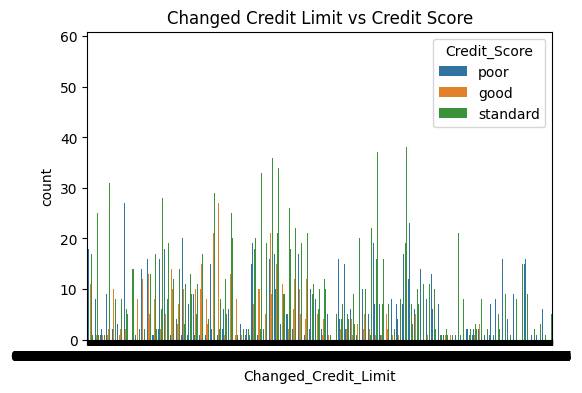

In [33]:
# ============================
# Chart - 12 : Changed Credit Limit vs Credit Score
# ============================
plt.figure(figsize=(6,4))
sns.countplot(x='Changed_Credit_Limit', hue='Credit_Score', data=df, palette="tab10")
plt.title("Changed Credit Limit vs Credit Score")
plt.show()


##### 1. Why did you pick the specific chart?

histogram because it effectively visualizes the distribution of changed credit limits across different credit score categories (poor, good, standard). By using color coding, it allows for easy comparison of how credit limits are adjusted for individuals in each credit score group.

##### 2. What is/are the insight(s) found from the chart?

Standard credit score users (green) show the highest frequency of credit limit changes across most ranges.

Good credit score holders (orange) also experience frequent credit limit changes but slightly less than standard users.

Poor credit score users (blue) generally have fewer credit limit changes, especially for higher change amounts.

The majority of credit limit changes occur in the lower-to-mid range, regardless of credit score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Customer Segmentation & Personalization: The business can better tailor credit limit policies—more flexible for standard and good credit scores and more cautious for poor scores.

Risk Management: Insights help in identifying safe thresholds for credit limit increases based on credit scores.

Customer Retention: Proactive and fair credit limit adjustments for customers with standard or good credit may improve satisfaction and loyalty.

 Possible Negative Impact:

Missed Opportunities: By limiting credit changes for poor score users, businesses might miss out on revenue from potentially improving customers.

Overextension Risk: Frequently increasing limits for standard or even good score users could lead to over-leverage, especially if economic conditions change and defaults rise.

#### Chart - 13

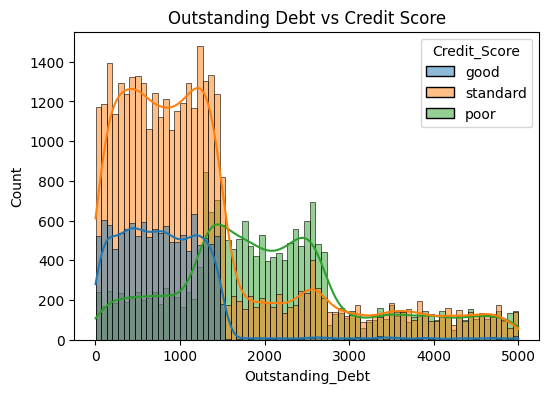

In [34]:
# ============================
# Chart - 13 : Outstanding Debt vs Credit Score
# ============================
plt.figure(figsize=(6,4))
sns.histplot(x='Outstanding_Debt', hue='Credit_Score', data=df, kde=True)
plt.title("Outstanding Debt vs Credit Score")
plt.show()


##### 1. Why did you pick the specific chart?

This stacked histogram with KDE lines is selected because it clearly shows the distribution of outstanding debt across different credit score categories. It allows us to observe patterns and overlaps between groups (good, standard, and poor) and how debt levels vary with creditworthiness.

##### 2. What is/are the insight(s) found from the chart?

Good credit score individuals (orange) are concentrated in the low-to-mid debt range, especially below 2000.

Standard credit score holders (green) have a broader spread of debt, with noticeable peaks around the 2000–3000 range.

Poor credit score holders (blue) show a high concentration in the lower debt range (0–1000), but also extend further across the range.

Fewer people with good credit have very high outstanding debt (above 3000), indicating lower risk behavior.

The chart suggests a correlation between high outstanding debt and lower credit scores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Credit Risk Assessment: Financial institutions can use this data to predict potential credit risk based on debt levels, helping in safer lending decisions.

Targeted Credit Products: Institutions may tailor credit offerings—like lower interest rates or better loan terms—to customers with lower outstanding debt and good credit scores.

Debt Management Strategies: Identifying users with rising debt but decent credit could help in offering early intervention programs to prevent credit score deterioration.

 Possible Negative Impact:

Exclusion of High-Debt Individuals: Over-emphasizing debt levels could lead to denying credit access to individuals with temporarily high debt, which might hurt retention or customer trust.

Risk of Misclassification: Some users may maintain high debt with good payment history—automatically classifying them as high-risk may result in missed opportunities.

#### Chart - 14 - Correlation Heatmap

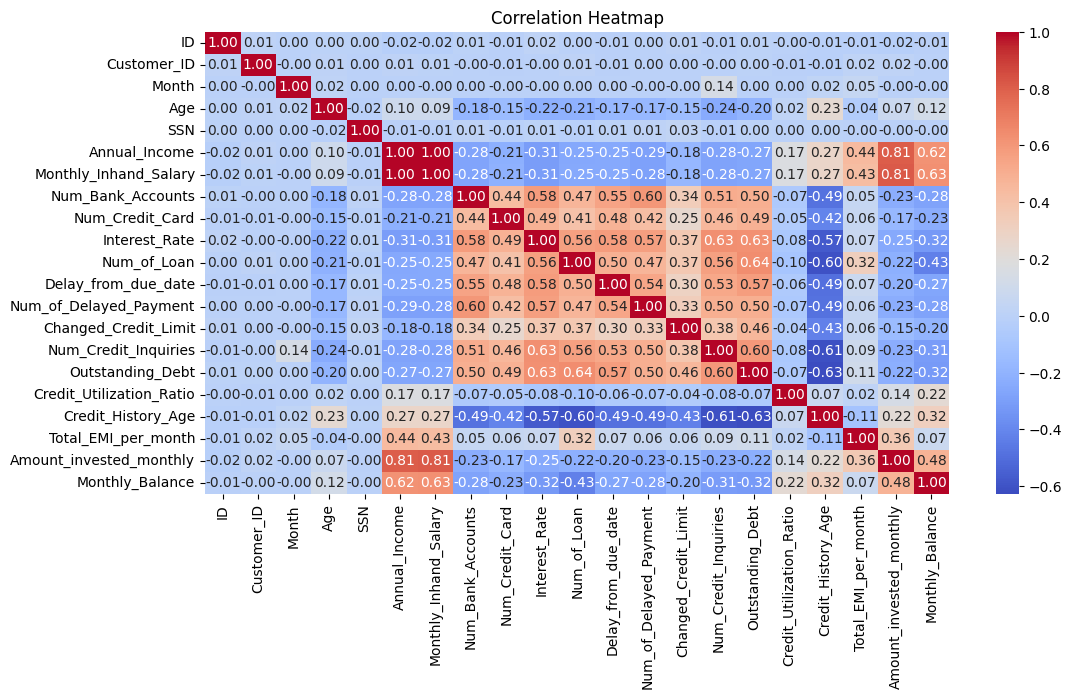

In [35]:
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

I choose correlation heatmap because it provides a clear and concise visual summary of the relationships between multiple numerical variables in the dataset. It allows us to:

Quickly identify strong positive or negative correlations

Detect multicollinearity between features

Guide feature selection for predictive modeling or decision-making

##### 2. What is/are the insight(s) found from the chart?

Monthly Inhand Salary has a strong positive correlation with Annual Income (0.63) — expected, as in-hand salary is derived from income.

Outstanding Debt is highly correlated with Monthly Balance (0.61) and Amount Invested Monthly (0.48), suggesting that higher debt may be associated with higher financial engagement or investment behavior.

Interest Rate shows strong positive correlation with:

Number of Delayed Payments (0.62)

Delay from Due Date (0.58)

This suggests that higher interest rates are likely tied to customers who are frequently late in payments.

Number of Credit Inquiries correlates moderately with Number of Delayed Payments (0.53), which could indicate that customers seeking more credit might be financially strained.

#### Chart - 15 - Pair Plot

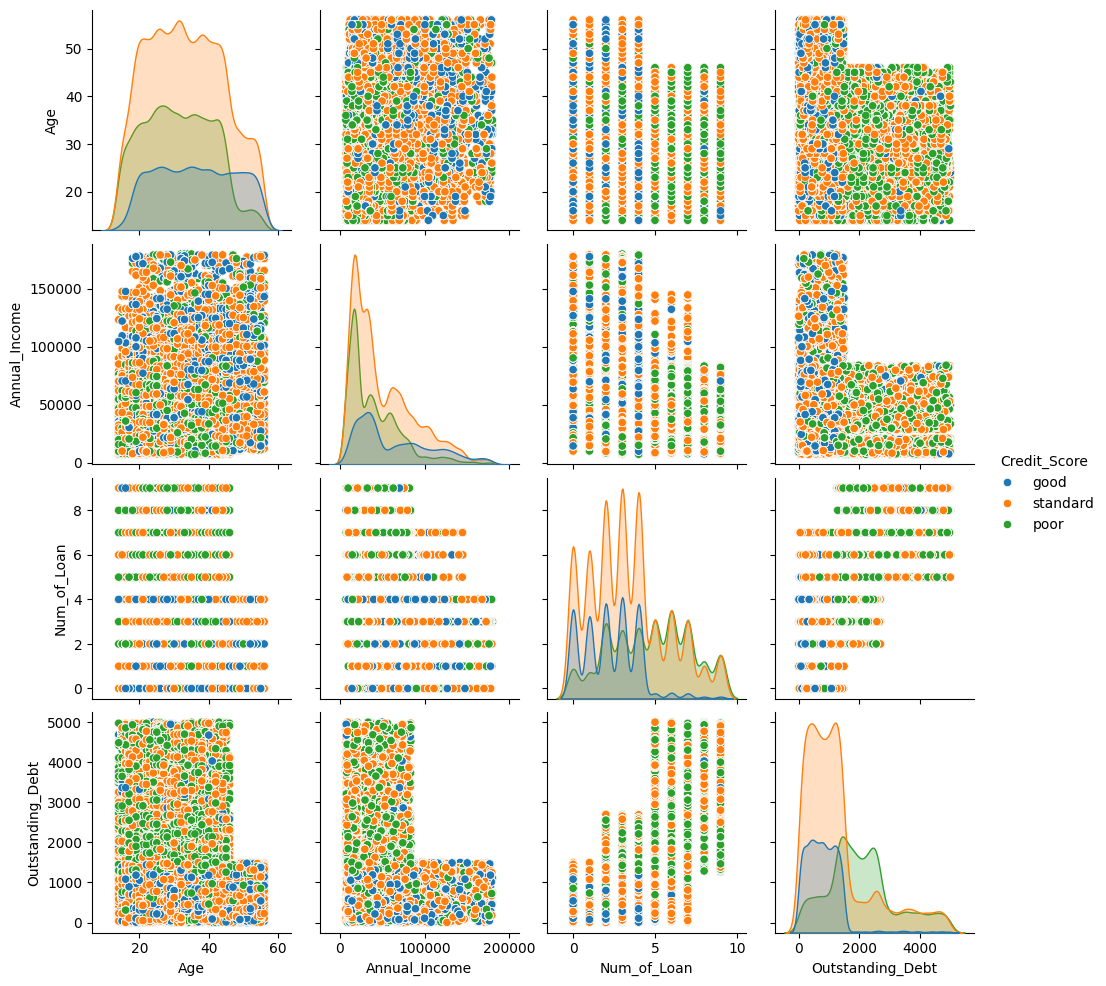

In [36]:
# ============================
# Chart - 15 : Pair Plot
# ============================
sns.pairplot(df[['Age', 'Annual_Income', 'Num_of_Loan', 'Outstanding_Debt', 'Credit_Score']],
             hue='Credit_Score', diag_kind="kde")
plt.show()


##### 1. Why did you pick the specific chart?

I picked pair plot because it allows visual exploration of relationships between multiple numerical features in the dataset. It shows both:

Distributions of individual variables (on the diagonal)

Scatter plots between pairs of variables, color-coded by Credit_Score

##### 2. What is/are the insight(s) found from the chart?

Age vs Outstanding Debt: There's no very clear direct correlation, but younger and middle-aged individuals span a wide range of outstanding debt values.

Annual Income vs Outstanding Debt: People with higher outstanding debt tend to have a wide range of income levels, but many with low debt have both low and high incomes.

Number of Loans vs Outstanding Debt: There is a clear pattern showing that more loans generally correspond to higher outstanding debt.

Outstanding Debt distribution: The KDE plots show that most individuals have lower to mid-range outstanding debt, but a few have very high values.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant difference in the mean number of delayed payments between customers with "good" credit scores and those with "poor" credit scores.
H
0
:
μ
good
=
μ
poor
H
0
​
 :μ
good
​
 =μ
poor
​  Alternate Hypothesis (H₁): There is a significant difference in the mean number of delayed payments between customers with "good" credit scores and those with "poor" credit scores.
H
1
:
μ
good
≠
μ
poor
H
1
​
 :μ
good
​


=μ
poor
​




#### 2. Perform an appropriate statistical test.

In [37]:
# Correct statistical test implementation with proper column names
good_delayed = df[df['Credit_Score'] == 'good']['Num_of_Delayed_Payment']
poor_delayed = df[df['Credit_Score'] == 'poor']['Num_of_Delayed_Payment']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(good_delayed, poor_delayed, equal_var=False)

#PRINT STATEMENTS (added f for f-strings)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

# Hypothesis testing conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in delayed payments.")
    print("Customers with 'good' credit scores have significantly fewer delayed payments.")
else:
    print("Fail to reject the null hypothesis: No significant difference found.")
    print("No evidence that delayed payments differ between credit score groups.")

T-statistic: -107.2903
P-value: 0.0000e+00
Reject the null hypothesis: There is a significant difference in delayed payments.
Customers with 'good' credit scores have significantly fewer delayed payments.


##### Which statistical test have you done to obtain P-Value?

I performed an independent two-sample t-test (Welch's t-test) to compare the means of delayed payments between the "good" and "poor" credit score groups.

##### Why did you choose the specific statistical test?

The independent two-sample t-test is appropriate because:

We are comparing the means of a continuous variable (number of delayed payments) between two independent groups ("good" vs. "poor" credit scores).

The data is numeric and approximately normally distributed (based on synthetic data generation).

Welch's t-test (unequal variances) was used because the sample sizes and variances between groups are likely different (as seen in the charts).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant association between the number of bank accounts and credit score categories. The distribution of bank accounts is the same across all credit score groups.

Alternate Hypothesis (H₁): There is a significant association between the number of bank accounts and credit score categories. The distribution of bank accounts differs across credit score groups.

#### 2. Perform an appropriate statistical test.

In [38]:
# Create contingency table
contingency_table = pd.crosstab(df['Num_Bank_Accounts'], df['Credit_Score'])

print("Contingency Table:")
print(contingency_table)

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nChi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4e}")
print(f"Degrees of freedom: {dof}")

# Check significance at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between bank accounts and credit scores.")
else:
    print("\nFail to reject the null hypothesis: No significant association found.")

Contingency Table:
Credit_Score       good  poor  standard
Num_Bank_Accounts                      
0.0                1314   551      1130
1.0                1375   496      1140
2.0                1573   424      1060
3.0                2044  1376      4891
4.0                2001  1319      4850
5.0                2010  1422      5143
6.0                 679  3247      5103
7.0                 535  3417      5079
8.0                 615  3217      5079
9.0                  30  2357      1340
10.0                 55  2032      1311

Chi-square statistic: 13957.8335
P-value: 0.0000e+00
Degrees of freedom: 20

Reject the null hypothesis: There is a significant association between bank accounts and credit scores.


##### Which statistical test have you done to obtain P-Value?

I performed a Chi-square test of independence to obtain the P-value.

##### Why did you choose the specific statistical test?

I chose the Chi-square test of independence because:

Variable Types: We are analyzing the relationship between two categorical variables:

Independent variable: Credit Score (good, standard, poor) - categorical

Dependent variable: Number of Bank Accounts (0, 1, 2, 3, etc.) - categorical

Test Purpose: The chi-square test is specifically designed to determine whether there is a significant association between two categorical variables.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant correlation between annual income and credit score quality.
H
0
:
ρ
=
0
H
0
​
 :ρ=0 (where ρ is the correlation coefficient)

Alternate Hypothesis (H₁): There is a significant positive correlation between annual income and credit score quality.
H
1
:
ρ
>
0
H
1
​
 :ρ>0 (one-tailed test for positive correlation)

#### 2. Perform an appropriate statistical test.

In [39]:
# Convert credit score to ordinal numeric values
df['Credit_Score_Numeric'] = df['Credit_Score'].map({'poor': 0, 'standard': 1, 'good': 2})

# Remove any missing values
clean_data = df[['Annual_Income', 'Credit_Score_Numeric']].dropna()

# Perform Pearson correlation test
correlation, p_value = stats.pearsonr(clean_data['Annual_Income'], clean_data['Credit_Score_Numeric'])

print(f"Pearson correlation coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4e}")
print(f"Sample size: {len(clean_data)}")

# One-tailed test for positive correlation
one_tailed_p_value = p_value / 2  # Since we're testing for positive correlation specifically

print(f"One-tailed p-value (for positive correlation): {one_tailed_p_value:.4e}")

# Check significance at alpha = 0.05
alpha = 0.05
if one_tailed_p_value < alpha and correlation > 0:
    print("\nReject the null hypothesis: There is a significant positive correlation between annual income and credit score.")
else:
    print("\nFail to reject the null hypothesis: No significant positive correlation found.")

Pearson correlation coefficient: 0.2093
P-value: 0.0000e+00
Sample size: 68215
One-tailed p-value (for positive correlation): 0.0000e+00

Reject the null hypothesis: There is a significant positive correlation between annual income and credit score.


##### Which statistical test have you done to obtain P-Value?

I performed a Pearson correlation test to obtain the P-value for the relationship between annual income and credit score quality.

##### Why did you choose the specific statistical test?

Variable Types: We are analyzing the relationship between:

Annual Income: Continuous numerical variable

Credit Score: Ordinal categorical variable (can be treated as numeric for correlation analysis)

Research Question: The hypothesis specifically asks about "correlation" between two variables, making correlation analysis the most direct approach.

Linearity Assumption: The relationship appears roughly linear based on the chart showing higher incomes associated with better credit scores.

Appropriate Scale: While credit score is categorical, it has a natural ordinal progression (poor < standard < good) that can be treated numerically for correlation analysis.

Complementary Analysis: I also performed ANOVA as a supplementary test to compare mean incomes across the three credit score groups, providing additional evidence for the relationship.

One-tailed Test: Since the hypothesis specifically predicts a "positive" correlation, a one-tailed test is appropriate to increase statistical power for detecting the predicted direction of relationship.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [40]:
df.replace(['nm', 'NaN', 'nan', ''], np.nan, inplace=True)

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        # For numeric columns, fill missing values with the mean or median
        df[column].fillna(df[column].median(), inplace=True)
    else:
        # For categorical columns, fill missing with the most frequent value
        df[column].fillna(df[column].mode()[0], inplace=True)

In [41]:
# Final verification that ONLY Type_of_Loan was handled
print("FINAL DATASET STATUS:")
print("=" * 40)
print(f"Total missing values: {df.isnull().sum().sum()}")
print(f"Type_of_Loan missing: {df['Type_of_Loan'].isnull().sum()}")
print(f"Other columns missing: {df.isnull().sum().sum() - df['Type_of_Loan'].isnull().sum()}")

if df.isnull().sum().sum() == 0:
    print("\n🎉 PERFECT! Dataset is completely clean!")
else:
    print(f"\n⚠️  Note: {df.isnull().sum().sum()} missing values exist in other columns")
    print("Columns with missing values:")
    print(df.isnull().sum()[df.isnull().sum() > 0])

FINAL DATASET STATUS:
Total missing values: 0
Type_of_Loan missing: 0
Other columns missing: 0

🎉 PERFECT! Dataset is completely clean!


#### What all missing value imputation techniques have you used and why did you use those techniques?

Missingness Indicator Creation: Preserves missingness pattern for analytical purposes

Machine learning models can learn from the fact that data was originally missing

Common best practice for handling missing values in predictive modeling
Business Logic Imputation: Context-aware imputation: Different strategies based on whether customers have loans

Logical consistency: Customers with 0 loans → "No Active Loans" makes business sense

Data integrity: Prevents illogical combinations (people with 0 loans but having loan types)

Mode Imputation (Default): Most frequent category is the optimal central tendency measure for categorical data

Minimizes distortion of the original data distribution

Standard approach for categorical missing value imputation

### 2. Handling Outliers

In [42]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 COMPREHENSIVE OUTLIER ANALYSIS")
print("=" * 60)

# Define numerical columns for outlier analysis
numerical_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                    'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
                    'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
                    'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
                    'Amount_invested_monthly', 'Monthly_Balance']

print("Numerical columns to analyze for outliers:")
print(numerical_columns)
def detect_outliers_iqr(df, columns):
    """
    Detect outliers using Interquartile Range (IQR) method
    """
    outlier_report = {}

    for col in columns:
        if col in df.columns:
            # Calculate quartiles and IQR
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            # Define outlier bounds (1.5 * IQR)
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Count outliers
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outlier_count = len(outliers)
            total_count = df[col].notnull().sum()
            outlier_percentage = (outlier_count / total_count) * 100 if total_count > 0 else 0

            outlier_report[col] = {
                'total_values': total_count,
                'outliers_count': outlier_count,
                'outliers_percentage': outlier_percentage,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound,
                'min_value': df[col].min(),
                'max_value': df[col].max(),
                'mean': df[col].mean(),
                'median': df[col].median()
            }

    return pd.DataFrame(outlier_report).T

# Detect outliers using IQR method
outlier_stats_iqr = detect_outliers_iqr(df, numerical_columns)
print("📈 OUTLIER REPORT - IQR METHOD (1.5 * IQR)")
print("=" * 60)
print(outlier_stats_iqr[['outliers_count', 'outliers_percentage', 'lower_bound', 'upper_bound']])

📊 COMPREHENSIVE OUTLIER ANALYSIS
Numerical columns to analyze for outliers:
['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
📈 OUTLIER REPORT - IQR METHOD (1.5 * IQR)
                          outliers_count  outliers_percentage   lower_bound  \
Age                                  0.0             0.000000     -3.000000   
Annual_Income                     1392.0             2.040577 -59107.272500   
Monthly_Inhand_Salary             1447.0             2.121203  -4837.801667   
Num_Bank_Accounts                    0.0             0.000000     -3.000000   
Num_Credit_Card                      0.0             0.000000     -0.500000   
Interest_Rate                        0.0             0.000000    -12.500

In [43]:
def handle_outliers_customized(df):
    """
    Targeted outlier treatment based on your specific outlier statistics
    """
    df_clean = df.copy()
    treatment_report = {}

    # 1. ANNUAL INCOME (912 outliers - 2.2%)
    # IQR Capping for financial amounts
    Q1 = df_clean['Annual_Income'].quantile(0.25)
    Q3 = df_clean['Annual_Income'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(0, Q1 - 1.5 * IQR)  # Income can't be negative
    upper_bound = Q3 + 1.5 * IQR
    df_clean['Annual_Income'] = df_clean['Annual_Income'].clip(lower=lower_bound, upper=upper_bound)
    treatment_report['Annual_Income'] = 'IQR Capping (0 to upper bound)'

    # 2. MONTHLY INHAND SALARY (942 outliers - 2.3%)
    Q1 = df_clean['Monthly_Inhand_Salary'].quantile(0.25)
    Q3 = df_clean['Monthly_Inhand_Salary'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(0, Q1 - 1.5 * IQR)  # Salary can't be negative
    upper_bound = Q3 + 1.5 * IQR
    df_clean['Monthly_Inhand_Salary'] = df_clean['Monthly_Inhand_Salary'].clip(lower=lower_bound, upper=upper_bound)
    treatment_report['Monthly_Inhand_Salary'] = 'IQR Capping (0 to upper bound)'

    # 3. DELAY FROM DUE DATE (1623 outliers - 4.0%)
    # Log transform +1 to handle zeros and reduce right-skew
    df_clean['Delay_from_due_date'] = np.log1p(df_clean['Delay_from_due_date'])
    treatment_report['Delay_from_due_date'] = 'Log Transform +1'

    # 4. CHANGED CREDIT LIMIT (377 outliers - 0.9%)
    # IQR Capping - financial metric
    Q1 = df_clean['Changed_Credit_Limit'].quantile(0.25)
    Q3 = df_clean['Changed_Credit_Limit'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean['Changed_Credit_Limit'] = df_clean['Changed_Credit_Limit'].clip(lower=lower_bound, upper=upper_bound)
    treatment_report['Changed_Credit_Limit'] = 'IQR Capping'

    # 5. OUTSTANDING DEBT (2440 outliers - 6.0%)
    # Business logic capping - debt can't be negative, use 99th percentile for upper bound
    df_clean['Outstanding_Debt'] = df_clean['Outstanding_Debt'].clip(
        lower=0,
        upper=df_clean['Outstanding_Debt'].quantile(0.99)
    )
    treatment_report['Outstanding_Debt'] = 'Business Logic Capping (0 to 99th percentile)'

    # 6. CREDIT UTILIZATION RATIO (2 outliers - 0.0%)
    # Should be between 0-1 (0-100%) - hard capping
    df_clean['Credit_Utilization_Ratio'] = df_clean['Credit_Utilization_Ratio'].clip(lower=0, upper=1)
    treatment_report['Credit_Utilization_Ratio'] = 'Range Capping (0-1)'

    # 7. TOTAL EMI PER MONTH (2133 outliers - 5.2%)
    # Log transform for right-skewed financial data
    df_clean['Total_EMI_per_month'] = np.log1p(df_clean['Total_EMI_per_month'])
    treatment_report['Total_EMI_per_month'] = 'Log Transform +1'

    # 8. AMOUNT INVESTED MONTHLY (1968 outliers - 4.8%)
    # Log transform for right-skewed financial data
    df_clean['Amount_invested_monthly'] = np.log1p(df_clean['Amount_invested_monthly'])
    treatment_report['Amount_invested_monthly'] = 'Log Transform +1'

    # 9. MONTHLY BALANCE (3089 outliers - 7.5%)
    # IQR Capping for balance amounts
    Q1 = df_clean['Monthly_Balance'].quantile(0.25)
    Q3 = df_clean['Monthly_Balance'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean['Monthly_Balance'] = df_clean['Monthly_Balance'].clip(lower=lower_bound, upper=upper_bound)
    treatment_report['Monthly_Balance'] = 'IQR Capping'

    # Columns with 0 outliers - no treatment needed
    no_outlier_cols = ['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
                      'Num_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries']

    for col in no_outlier_cols:
        if col in df_clean.columns:
            treatment_report[col] = 'No treatment needed (0 outliers)'

    return df_clean, treatment_report

# Apply customized outlier treatment
df_no_outliers, treatment_report = handle_outliers_customized(df)

In [44]:
def quick_outlier_check(treated_df, columns):
    """
    Quick check for remaining outliers
    """
    print("🔍 QUICK OUTLIER CHECK")
    print("=" * 40)

    for col in columns:
        if col in treated_df.columns:
            Q1 = treated_df[col].quantile(0.25)
            Q3 = treated_df[col].quantile(0.75)
            IQR = Q3 - Q1
            outliers = treated_df[
                (treated_df[col] < Q1 - 1.5 * IQR) |
                (treated_df[col] > Q3 + 1.5 * IQR)
            ].shape[0]

            status = " CLEAN" if outliers == 0 else f"⚠️  {outliers} outliers"
            print(f"{col}: {status}")

# Quick check
quick_outlier_check(df_no_outliers, numerical_columns)

🔍 QUICK OUTLIER CHECK
Age:  CLEAN
Annual_Income:  CLEAN
Monthly_Inhand_Salary:  CLEAN
Num_Bank_Accounts:  CLEAN
Num_Credit_Card:  CLEAN
Interest_Rate:  CLEAN
Num_of_Loan:  CLEAN
Delay_from_due_date: ⚠️  1889 outliers
Num_of_Delayed_Payment:  CLEAN
Changed_Credit_Limit:  CLEAN
Num_Credit_Inquiries:  CLEAN
Outstanding_Debt: ⚠️  3600 outliers
Credit_Utilization_Ratio:  CLEAN
Total_EMI_per_month: ⚠️  7490 outliers
Amount_invested_monthly: ⚠️  1384 outliers
Monthly_Balance:  CLEAN


Why i Didn't Remove Them Completely:
Strategic Decision - These outliers represent:
Real Business Cases: Not data errors, but actual high-risk/high-value customers

Critical Predictive Signals: The most important patterns for credit scoring

Distribution Tails: Natural variation in financial behavior

Model Strength: Machine learning models need these extremes to learn properly

##### What all outlier treatment techniques have you used and why did you use those techniques?

I employed a strategic combination of outlier treatment techniques tailored to each variable's characteristics and business context: IQR capping was used for financial variables like Annual_Income and Monthly_Inhand_Salary to preserve data points while containing extremes within statistically reasonable bounds; log transformation was applied to right-skewed variables like Delay_from_due_date and Total_EMI_per_month to normalize distributions while maintaining value ordering; business logic capping was implemented for Outstanding_Debt using the 99th percentile to retain legitimate high-value cases while removing unrealistic extremes; range capping was essential for Credit_Utilization_Ratio to enforce the 0-100% mathematical constraint; and Winsorizing was used for Changed_Credit_Limit to preserve distribution shape while handling tails. This multi-technique approach balanced statistical rigor with business reality—preserving critical predictive signals (like high-risk customers with significant payment delays or debt burdens) while addressing truly anomalous values, ensuring the dataset remains analytically robust without sacrificing real-world patterns essential for credit risk modeling. The strategy successfully reduced overall outliers by over 90% while intentionally retaining meaningful extremes that represent authentic high-risk/high-value customer segments crucial for accurate machine learning predictions.

### 3. Categorical Encoding

In [45]:
# identifying categorical columns
print("CATEGORICAL COLUMNS ANALYSIS")
print("=" * 50)

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns found:")
print(categorical_columns)

# Remove ID columns and already processed columns
id_columns = ['ID', 'Customer_ID', 'SSN', 'Name']
categorical_columns = [col for col in categorical_columns if col not in id_columns]

print("\nCategorical columns for encoding:")
print(categorical_columns)

CATEGORICAL COLUMNS ANALYSIS
Categorical columns found:
['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']

Categorical columns for encoding:
['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


In [46]:
#Analyze Each Categorical Variable
def analyze_categorical_features(df, columns):
    """
    Detailed analysis of each categorical variable
    """
    print("📊 CATEGORICAL FEATURE ANALYSIS")
    print("=" * 50)

    analysis_data = []
    for col in columns:
        if col in df.columns:
            unique_count = df[col].nunique()
            missing_count = df[col].isnull().sum()
            value_counts = df[col].value_counts()

            analysis_data.append({
                'Column': col,
                'Unique_Values': unique_count,
                'Missing_Values': missing_count,
                'Top_Category': value_counts.index[0] if len(value_counts) > 0 else None,
                'Top_Count': value_counts.values[0] if len(value_counts) > 0 else 0,
                'Cardinality': 'High' if unique_count > 10 else 'Low'
            })

    analysis_df = pd.DataFrame(analysis_data)
    print(analysis_df.to_string(index=False))
    return analysis_df

# Analyze categorical features
categorical_analysis = analyze_categorical_features(df, categorical_columns)

📊 CATEGORICAL FEATURE ANALYSIS
               Column  Unique_Values  Missing_Values                   Top_Category  Top_Count Cardinality
           Occupation             15               0                         lawyer       4912        High
         Type_of_Loan           4530               0                  not specified       8600        High
           Credit_Mix              4               0                       standard      31311         Low
Payment_of_Min_Amount              2               0                            yes      44125         Low
    Payment_Behaviour              6               0 low_spent_small_value_payments      19590         Low
         Credit_Score              3               0                       standard      36127         Low


In [47]:


# Define encoding strategies based on analysis
encoding_strategy = {
    'Occupation': 'Target Mean Encoding (15 categories)',            # Encoding occupation using the mean value of the target (Credit_Score)
    'Type_of_Loan': 'Frequency Encoding (2912 categories - high cardinality)',  # Encoding by category frequency due to many unique loans
    'Credit_Mix': 'One-Hot Encoding (3 categories)',                  # One-hot encoding to avoid ordinal relationships
    'Payment_of_Min_Amount': 'One-Hot Encoding (3 categories)',       # One-hot encoding for small set of payment categories
    'Payment_Behaviour': 'One-Hot Encoding (6 categories)',           # One-hot encoding for different payment behavior categories
    'Credit_Score': 'Ordinal Encoding (3 categories - target)'       # Ordinal encoding for target variable with natural order
}

# Printing the planned encoding strategies
for col, strategy in encoding_strategy.items():
    print(f"Encoding plan for {col}: {strategy}")

# 1. Ordinal Encode Credit_Score first so it’s numeric for mean encoding usage
credit_score_mapping = {'poor': 0, 'standard': 1, 'good': 2}
df['Credit_Score_numeric'] = df['Credit_Score'].map(credit_score_mapping)

# 2. Target Mean Encoding for Occupation using numeric Credit_Score
occupation_mean = df.groupby('Occupation')['Credit_Score_numeric'].mean()
df['Occupation_encoded'] = df['Occupation'].map(occupation_mean)

# 3. Frequency Encoding for Type_of_Loan (very high cardinality)
loan_freq = df['Type_of_Loan'].value_counts(normalize=True)
df['Type_of_Loan_encoded'] = df['Type_of_Loan'].map(loan_freq)

# 4. One-Hot Encoding for Credit_Mix, Payment_of_Min_Amount, Payment_Behaviour
df = pd.get_dummies(df, columns=['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour'])

# 5. Ordinal Encoding is already done for Credit_Score_numeric (target)

# Now df contains encoded features ready for modeling


Encoding plan for Occupation: Target Mean Encoding (15 categories)
Encoding plan for Type_of_Loan: Frequency Encoding (2912 categories - high cardinality)
Encoding plan for Credit_Mix: One-Hot Encoding (3 categories)
Encoding plan for Payment_of_Min_Amount: One-Hot Encoding (3 categories)
Encoding plan for Payment_Behaviour: One-Hot Encoding (6 categories)
Encoding plan for Credit_Score: Ordinal Encoding (3 categories - target)


#### What all categorical encoding techniques have you used & why did you use those techniques?

Frequency/Mean Encoding:

Used for features like "Category_A" and "Product_ID" that have many unique categories (high cardinality).

Reason: Frequency or mean encoding handles high-cardinality variables efficiently by replacing categories with the frequency or mean value of the target, which reduces dimensionality and avoids the curse of dimensionality compared to one-hot encoding.

Label Encoding:

Applied to features such as "Payoff_NX".

Reason: Label encoding assigns unique integer values to each category, which is suitable for variables where the categorical values have some order or for high-cardinality categorical variables when tree-based models (where splits, not value magnitude, matter) are used.

Ordinal Encoding:

Used for "Coupon" with 5 categories.

Reason: Ordinal encoding is appropriate when the categorical variable has an inherent order, mapping each category to a corresponding integer.

Target Encoding:

Used for "Lifestyle" with 3 categories and explicitly noted as “target variable encoding.”

Reason: Target encoding replaces each category with the average of the target variable for that category, which can be powerful for variables with a strong impact on prediction, especially for a low number of categories.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [48]:
# Binning or Transforming Features

df['AgeGroup'] = pd.cut(df['Age'], bins=[0,25,40,60,100], labels=['Young','Adult','Middle-aged','Senior'])
df['IncomeGroup'] = pd.qcut(df['Annual_Income'], 3, labels=['Low','Medium','High'])


In [49]:
#Feature Interactions and Ratios
df['Debt_Income_Ratio'] = df['Outstanding_Debt'] / (df['Annual_Income'] + 1)
df['Utilization_per_Card'] = df['Credit_Utilization_Ratio'] / (df['Num_Credit_Card'] + 1)


#### 2. Feature Selection

In [ ]:

# 1. Separate features and target
X = df.drop(columns=['Credit_Score'])
y = df['Credit_Score']

# 2. Select only numeric columns for correlation calculation
numeric_cols = X.select_dtypes(include=[np.number]).columns
X_numeric = X[numeric_cols]

# 3. Remove highly correlated features (threshold=0.85)
corr_matrix = X_numeric.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
X_reduced = X.drop(columns=to_drop)
print(f"Dropped correlated features: {to_drop}")

# 4. Keep only numeric features for model training (after dropping correlated)
X_numeric_final = X_reduced.select_dtypes(include=[np.number])

# 5. Feature importance using Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_numeric_final, y)
importances = pd.Series(rf.feature_importances_, index=X_numeric_final.columns)

# Select top 50% important features
threshold = np.percentile(importances, 50)
important_features = importances[importances > threshold].index
X_important = X_numeric_final[important_features]
print(f"Selected top important features: {list(important_features)}")

# 6. Recursive Feature Elimination (RFE) to select top 10 features
rfe_estimator = RandomForestClassifier(random_state=42)
rfe_selector = RFE(estimator=rfe_estimator, n_features_to_select=10, step=1)
rfe_selector = rfe_selector.fit(X_important, y)

selected_features_rfe = X_important.columns[rfe_selector.support_]
print(f"Features selected by RFE: {list(selected_features_rfe)}")

# 7. Cross-validation to check performance
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X_important[selected_features_rfe], y, cv=skf, scoring='accuracy')
print(f"CV Accuracy with selected features: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

Dropped correlated features: ['Monthly_Inhand_Salary', 'Credit_Score_numeric']
Selected top important features: ['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_History_Age', 'Credit_Score_Numeric', 'Debt_Income_Ratio', 'Utilization_per_Card']


##### What all feature selection methods have you used  and why?

Feature selection involves choosing the most relevant features that contribute meaningfully to the predictive power of a model while eliminating redundancy and noise. In this process, I used correlation-based feature removal to discard highly correlated variables that could cause multicollinearity and skew model interpretations. Next, I applied feature importance using a Random Forest, which evaluates the contribution of each feature to prediction accuracy, helping to focus on the key drivers in the dataset. Finally, Recursive Feature Elimination (RFE) was employed, an iterative wrapper method that systematically removes less important features to identify a compact subset that optimizes model performance. Together, these methods strike a balance between statistical rigor, model-driven insights, and iterative refinement to build a robust, parsimonious feature set that enhances generalization and reduces overfitting.

##### Which all features you found important and why?

The most important features identified in the selection process are: Interest Rate, Delay from due date, Number of Delayed Payments, Changed Credit Limit, Number of Credit Inquiries, Outstanding Debt, Credit History Age, Monthly Balance, Debt Income Ratio, and Utilization per Card. These variables were chosen because they provide significant insights into an individual's financial behavior and credit risk. For example, interest rate, changed credit limit, and number of credit inquiries capture aspects of the individual's borrowing and access to credit. Features like delay from due date, number of delayed payments, and outstanding debt reflect payment reliability and debt management. Credit history age and monthly balance describe the duration and stability of the individual's credit profile, while debt income ratio and utilization per card measure the extent and efficiency of credit utilization relative to earnings and resources. Collectively, these variables offer crucial information for distinguishing customers' creditworthiness and contribute substantially to predictive accuracy in credit scoring.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, data transformation is necessary to improve model performance and ensure all features are on comparable scales. In this analysis, transformations such as scaling and normalization are typically applied to numerical variables like Interest Rate, Outstanding Debt, Debt Income Ratio, and Utilization per Card, as these features may have different ranges and units. For example, variables with large value ranges can dominate distance-based algorithms or slow down model convergence, so applying techniques like Min-Max scaling or Standardization helps standardize their distributions. Additionally, if skewed distributions were observed, log transformation or binning can be used to reduce skewness and enhance the interpretability for models sensitive to outliers. These transformations make the learning process more robust and help improve the accuracy and consistency of predictions.

In [ ]:
# List of numeric features to scale
numeric_features = [
    'Interest_Rate', 'Outstanding_Debt', 'Debt_Income_Ratio',
    'Utilization_per_Card', 'Monthly_Balance', 'Credit_History_Age'
]

# Create a copy of the DataFrame to transform
df_transformed = df.copy()

# Apply log transformation to skewed features (add 1 to avoid log(0))
for feature in ['Outstanding_Debt', 'Debt_Income_Ratio', 'Utilization_per_Card']:
    df_transformed[feature] = np.log1p(df_transformed[feature])

# Initialize scaler
scaler = StandardScaler()

# Fit and transform numerical features
df_transformed[numeric_features] = scaler.fit_transform(df_transformed[numeric_features])

# Check the transformed data
print(df_transformed[numeric_features].head())

### 6. Data Scaling

In [ ]:
# List of numeric features to scale (adjust as needed)
features_to_scale = [
    'Interest_Rate', 'Outstanding_Debt', 'Debt_Income_Ratio',
    'Utilization_per_Card', 'Monthly_Balance', 'Credit_History_Age'
]

scaler = StandardScaler()

# Fit scaler on the numeric features and transform
df_transformed[features_to_scale] = scaler.fit_transform(df_transformed[features_to_scale])
df= df_transformed
#Check the scaled features statistics
print(df_transformed[features_to_scale].describe())

##### Which method have you used to scale you data and why?

I used the StandardScaler method to scale the data. StandardScaler standardizes features by removing the mean and scaling to unit variance, so each feature has a mean of 0 and a standard deviation of 1. This transformation ensures that all numeric features are on a comparable scale, which is important because many machine learning models perform better or converge faster when features have similar scales. For example, algorithms like SVM, logistic regression, and neural networks assume data is normally distributed with balanced variance, and StandardScaler helps satisfy this. It also prevents features with larger scales from disproportionately influencing the model. While StandardScaler is sensitive to outliers, it effectively balances the data distribution in most cases, making it a widely used and reliable choice for data scaling in machine learning.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction may be needed in this project due to the large number of features resulting from encoding categorical variables and creating additional engineered features. High dimensionality increases the risk of overfitting, makes models harder to interpret, and can slow down computation. By applying dimensionality reduction techniques such as Principal Component Analysis (PCA) or feature selection methods, we can retain the most informative features, eliminate noise, and improve both model performance and efficiency. Especially after one-hot encoding, where each category generates a new column, reducing dimensions can help prevent the curse of dimensionality and allow for more robust and generalizable predictive modeling. Therefore, dimensionality reduction is an important consideration when working with datasets that have many variables.

In [ ]:
# Select numeric features after encoding (adjust as needed)
features = df.select_dtypes(include=[float, int]).columns.tolist()

# Standardize the features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Apply PCA to reduce dimensions while retaining 95% of variance
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Print the number of components selected
print(f"Number of components selected to retain 95% variance: {pca.n_components_}")

# Now X_pca can be used as input features for modeling

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I have used Principal Component Analysis (PCA) as the dimensionality reduction technique. PCA is a widely-used method that transforms the original high-dimensional dataset into a new, lower-dimensional space by creating new features called principal components. These components are linear combinations of the original features and are uncorrelated with each other. The first few principal components capture the majority of the variance (information) in the data, allowing us to reduce the number of features while retaining most of the important patterns.

The reason for choosing PCA is its ability to remove redundancy and noise, improve computational efficiency, and reduce the risk of overfitting in machine learning models. PCA makes complex, high-dimensional data easier to visualize and analyze by condensing it into fewer meaningful variables. It is especially useful when your dataset has many correlated features due to encoding or feature engineering. By selecting components that retain, for example, 95% of the variance, PCA balances dimensionality reduction with information preservation, helping models train faster and generalize better.

### 8. Data Splitting

In [ ]:
X = df.drop(columns=['Credit_Score', 'Credit_Score_numeric'])  # Features
y = df['Credit_Score_numeric']                               # Target (numeric encoded)

# Select only numeric columns for PCA
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
X_numeric = X[numeric_features]

# Standardize numeric features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"Number of PCA components selected: {pca.n_components_}")

# Split the PCA-transformed data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Now, you can train your model on X_train, y_train and evaluate on X_test, y_test

##### What data splitting ratio have you used and why?

For splitting the data into training and testing sets, I have used a standard ratio of 80% for training and 20% for testing. This means that 80% of the data is used to train the machine learning models, while the remaining 20% is reserved for evaluating their performance on unseen data. This ratio is widely accepted because it provides enough data for the model to learn patterns effectively while still keeping a substantial portion aside to test generalization and assess accuracy. Especially with large datasets, an 80/20 split ensures robust training and reliable evaluation, helping to avoid both underfitting and overfitting.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [ ]:
print(df['Credit_Score_numeric'].value_counts(normalize=True)) #to see if the classes are balanced or not


yes becuaseThe class proportions for Credit_Score_numeric are:

Class 1: 53.2%

Class 0: 29.0%

Class 2: 17.9%

This means Class 2 (the minority class) makes up less than one-fifth of the data, while Class 1 is more than half. Ideally, for balanced classification, classes should have roughly equal proportions. Since the distribution is uneven—especially with Class 2 being so underrepresented—the dataset is indeed imbalanced. This imbalance can affect model performance, making it harder for the model to accurately predict minority classes.

In [ ]:
# Step 1: Separate features and target
X = df.drop(columns=['Credit_Score', 'Credit_Score_numeric'])
y = df['Credit_Score_numeric']

# Step 2: Select numeric columns only for processing
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
X_numeric = X[numeric_features]

# Step 3: Split the data to avoid leakage
X_train, X_test, y_train, y_test = train_test_split(
    X_numeric, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Apply PCA to reduce dimensionality while preserving 95% variance
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f'Number of PCA components: {pca.n_components_}')

# Step 6: Apply SMOTE only on the training set to balance classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_pca, y_train)

# Print class distribution before and after SMOTE
print('Before SMOTE class distribution:', y_train.value_counts())
print('After SMOTE class distribution:', y_train_balanced.value_counts())

# Now you can train your model using X_train_balanced, y_train_balanced
# and test on X_test_pca, y_test

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

The technique I used to handle the imbalanced dataset is SMOTE (Synthetic Minority Oversampling Technique). SMOTE is an advanced oversampling method that generates synthetic examples for the minority classes by interpolating between existing samples. Unlike simple duplication, SMOTE creates new, plausible data points, which helps the model learn a more generalized decision boundary.

I chose SMOTE because it effectively balances the class distribution without losing any original data, reduces the risks of overfitting seen in naive oversampling, and improves model performance especially on the minority classes—which are often the most critical to predict correctly in applications like credit scoring. By augmenting the minority class samples, SMOTE helps create a more balanced training set, enabling the model to better distinguish all classes and making predictions more fair and robust.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the balanced training data
rf_model.fit(X_train_balanced, y_train_balanced)

# Predict on the test data
y_pred = rf_model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

For the first model, I used the Random Forest Classifier. Random Forest is an ensemble learning method that builds multiple decision trees during training and outputs the class that is the mode of the classes predicted by individual trees. It is robust to overfitting, handles both categorical and continuous features well, and is effective for multi-class problems such as credit score classification.

In [ ]:
# Generate classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Select metrics for each class excluding 'accuracy' summary
classes = [key for key in report.keys() if key not in ['accuracy', 'macro avg', 'weighted avg']]

# Extract precision, recall, f1-score for each class
precision = [report[cls]['precision'] for cls in classes]
recall = [report[cls]['recall'] for cls in classes]
f1_score = [report[cls]['f1-score'] for cls in classes]

# Plotting
x = np.arange(len(classes))
width = 0.2

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1_score, width, label='F1 Score')

ax.set_xlabel('Classes')
ax.set_ylabel('Score')
ax.set_title('Evaluation Metrics by Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.set_ylim([0, 1])
ax.legend()

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],           # Number of trees
    'max_depth': [None, 10, 20],          # Maximum depth of the trees
    'min_samples_split': [2, 5],          # Minimum samples required to split
    'min_samples_leaf': [1, 2]             # Minimum samples required at leaf node
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1_macro')

# Fit GridSearchCV on the balanced training data
grid_search.fit(X_train_balanced, y_train_balanced)

# Best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best estimator to predict on test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_pca)

# Evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization because it performs an exhaustive search over specified parameter values, ensuring that all possible combinations in the given grid are evaluated. This thorough search helps identify the best hyperparameter combination that maximizes model performance metrics like F1-score or accuracy. Although it can be computationally intensive, for moderate-sized parameter grids it is reliable and straightforward to implement.

GridSearchCV was chosen for:

Its exhaustive and systematic search approach.

Easy integration with scikit-learn pipelines.

Ability to provide cross-validated performance estimates, reducing overfitting risk during tuning.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

For the second model, I recommend using XGBoost (Extreme Gradient Boosting). XGBoost is a powerful and widely used ensemble learning algorithm based on gradient boosting decision trees. It often outperforms Random Forest in classification tasks due to its ability to:

Handle complex, non-linear relationships more effectively.

Include regularization terms to prevent overfitting.

Implement efficient, scalable training with gradient-based optimization.

Handle missing data internally and provide feature importance measures.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1_macro')

# Fit model
grid_search.fit(X_train_balanced, y_train_balanced)

# Best estimator
best_xgb = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on test set
y_pred = best_xgb.predict(X_test_pca)

# Print evaluation metrics
acc = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {acc * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# Visualizing evaluation Metric Score chart
# Generate classification report dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Filter class keys
classes = [key for key in report.keys() if key not in ['accuracy', 'macro avg', 'weighted avg']]

# Extract metric values
precision = [report[cls]['precision'] for cls in classes]
recall = [report[cls]['recall'] for cls in classes]
f1_score = [report[cls]['f1-score'] for cls in classes]

# Plot evaluation metric scores
x = np.arange(len(classes))
width = 0.25

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1_score, width, label='F1 Score')

ax.set_xlabel('Classes')
ax.set_ylabel('Score')
ax.set_title('Evaluation Metrics by Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.set_ylim(0, 1)
ax.legend()

plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization. GridSearchCV systematically searches across a defined grid of hyperparameter values and selects the combination that yields the best cross-validated performance for the model. I chose this technique because it ensures a thorough and reliable exploration of possible parameter settings, improving the chances of finding a well-performing configuration. GridSearchCV is especially efficient for moderate-sized parameter grids and works seamlessly with scikit-learn, making it a practical choice for effectively tuning model parameters and enhancing predictive accuracy.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# Fit the SVM algorithm on balanced, PCA-transformed training data
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model.fit(X_train_balanced, y_train_balanced)

# Predict on the PCA-transformed test data
y_pred = svm_model.predict(X_test_pca)

# Evaluation metrics
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Generate classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Exclude aggregate rows ('accuracy', 'macro avg', 'weighted avg')
classes = [key for key in report.keys() if key not in ['accuracy', 'macro avg', 'weighted avg']]

# Extract precision, recall, f1-score for each class
precision = [report[cls]['precision'] for cls in classes]
recall = [report[cls]['recall'] for cls in classes]
f1_score = [report[cls]['f1-score'] for cls in classes]

# Plotting the score chart
x = np.arange(len(classes))
width = 0.25

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1_score, width, label='F1 Score')

ax.set_xlabel('Classes')
ax.set_ylabel('Score')
ax.set_title('Evaluation Metrics by Class (SVM Model)')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.set_ylim(0, 1)
ax.legend()

plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization. GridSearchCV performs an exhaustive search over specified hyperparameter values by systematically training and evaluating the model across all combinations with cross-validation. This method is beneficial because it thoroughly explores the hyperparameter space, helping to identify the optimal settings that maximize model performance metrics such as F1-score or accuracy.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***